In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [3]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue
        if "FCs" in path: continue
        if "G1" in path: continue
        if "Mean" in path: continue
        if "gs" in path: continue        
        if "hs" in path: continue
        if "Mask" in path: continue
        if "LR001" in path: continue
        
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        if "Output_GU" in path and "__GU" in path and "LR" in path:
            data["Scaling"] = path.split("__GU")[1].split("/")[0] 
            # continue
        elif "__GU" in path: 
            number = float(path.split("__GU")[1].split("/")[0])
            # print(number)
            data["Scaling"] = "GU" + str(number)
        elif "__GGU" in path: 
            number = float(path.split("__GGU")[1].split("/")[0])
            # print(number)
            data["Scaling"] = "GGU" + str(number)
            

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

In [4]:
## CIFAR100

In [5]:
# data_temp3 = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

In [6]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
data_temp3 = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 50])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

KeyboardInterrupt: 

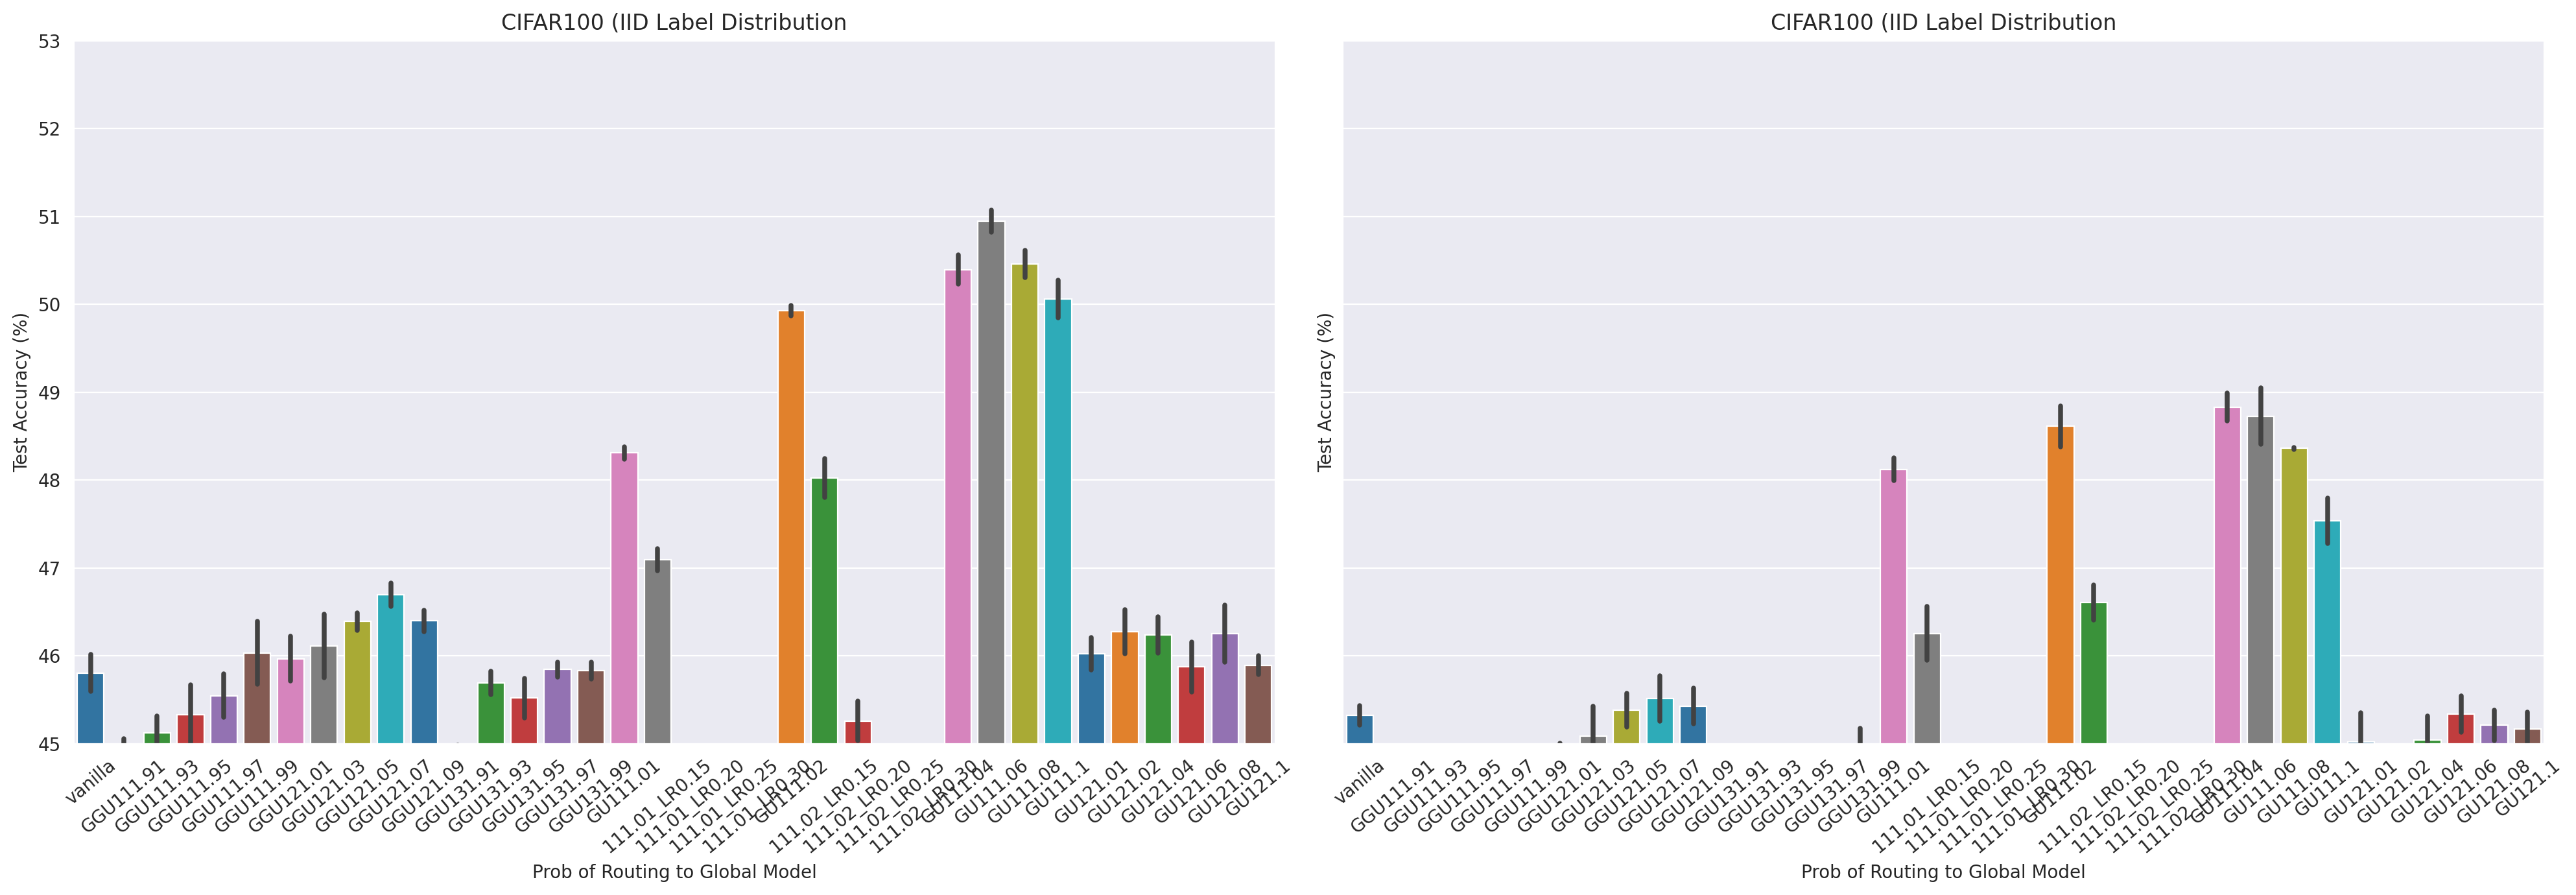

In [ ]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
data_temp3 = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
#         sk = ["vanilla", "112", "113", "114", "115", "116"]
#         temp = temp.set_index('Scaling').loc[sk].reset_index()
        
#         temp = temp.replace({"Scaling": 
#                          {"112": "50%", 
#                           "113": "60%", 
#                           "114": "70%", 
#                           "115": "80%", 
#                           "116": "90%"}
                     # })
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        # break
    fig.tight_layout()
    plt.pause(0.1)

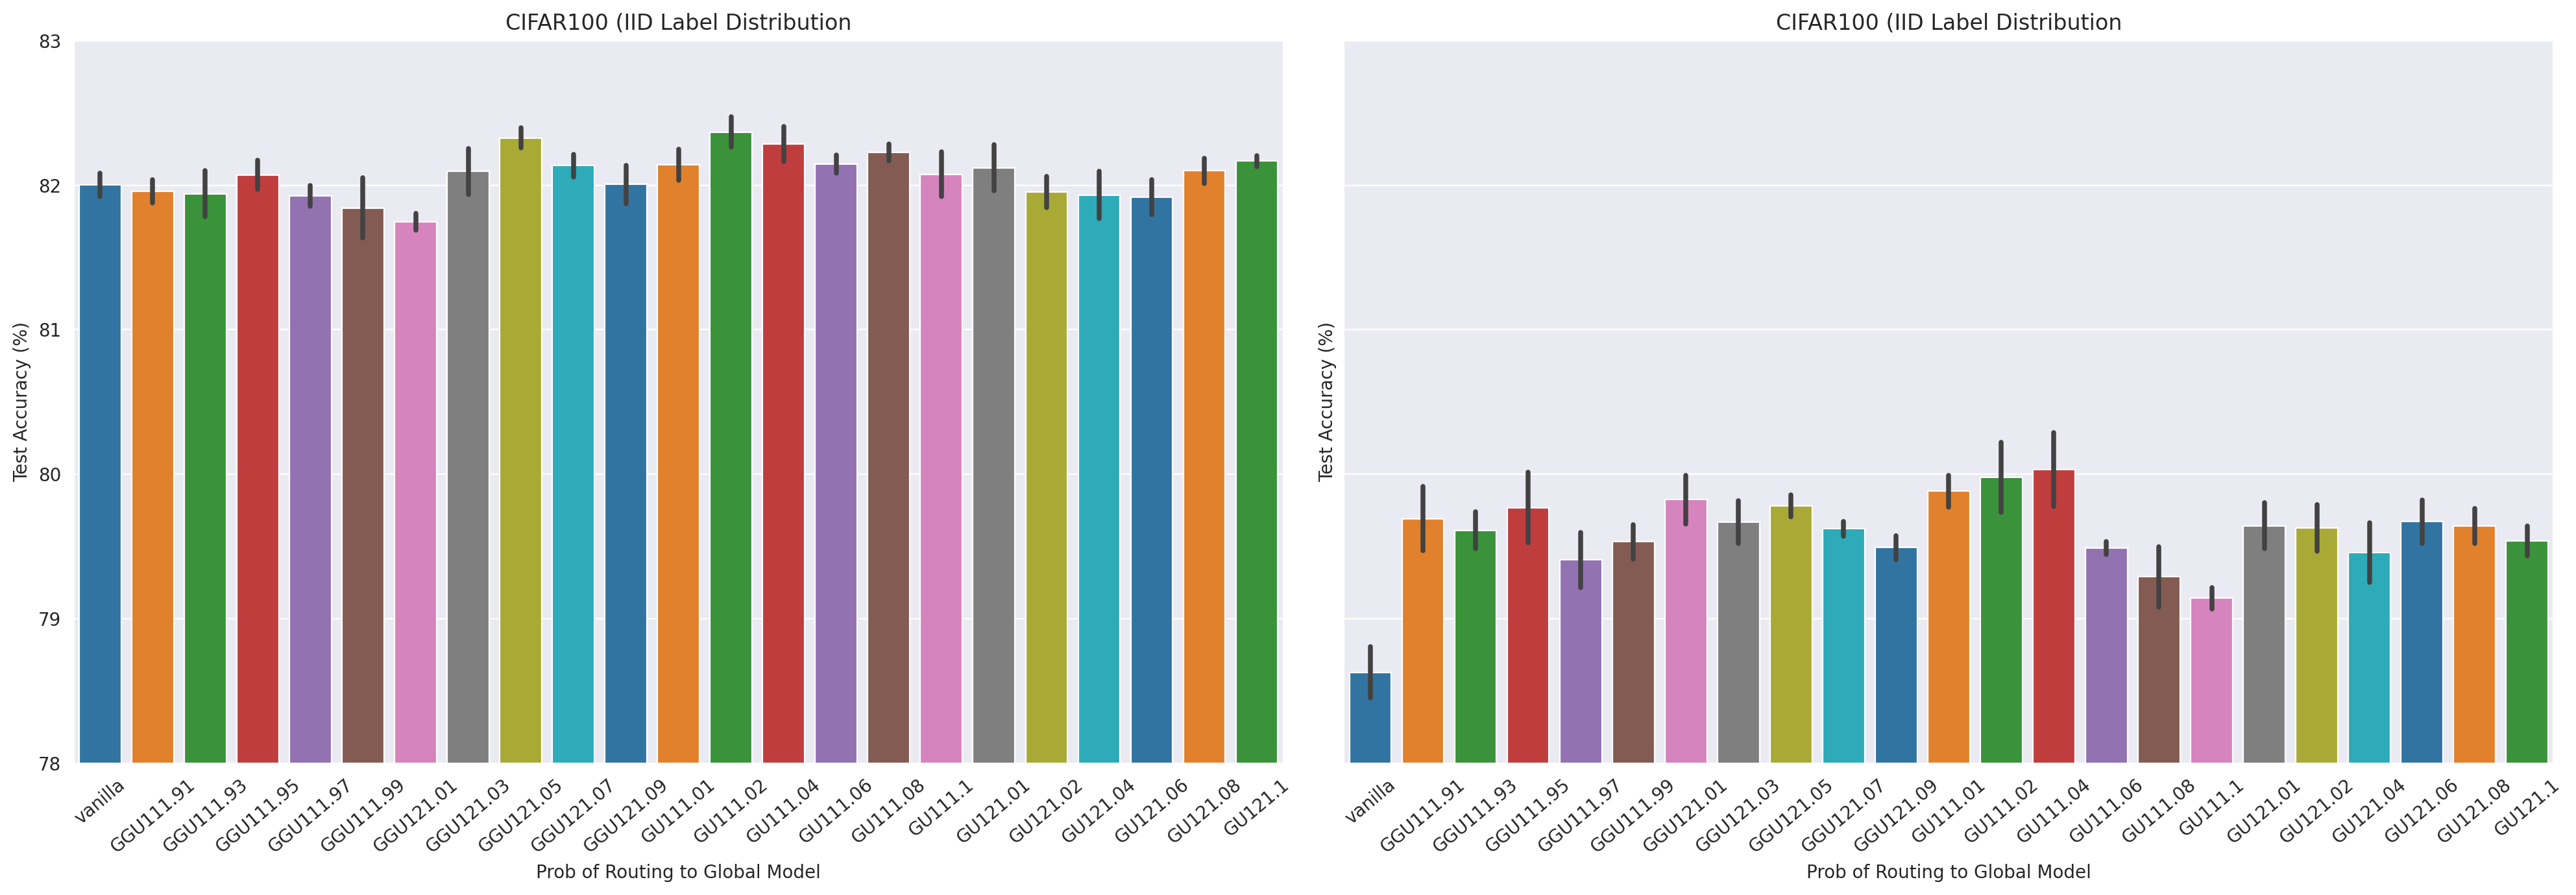

In [ ]:
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp3 = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp2, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 83])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        # break
    fig.tight_layout()
    plt.pause(0.1)

In [ ]:
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == 0.01]
# temp = temp[temp["epoch"] == 999]
temp["Scaling"].unique()

In [ ]:
data_temp["Scaling"].unique()

array(['vanilla', 'GGU111.9', 'GGU111.75', 'GGU111.91', 'GGU111.93',
       'GGU111.95', 'GGU111.97', 'GGU111.99', 'GGU121.01', 'GGU121.03',
       'GGU121.05', 'GGU121.07', 'GGU121.09', 'GU111.1', 'GU111.01',
       'GU111.02', 'GU111.04', 'GU111.5', 'GU111.06', 'GU111.08',
       'GU121.1', 'GU121.01', 'GU121.02', 'GU121.04', 'GU121.06',
       'GU121.08'], dtype=object)

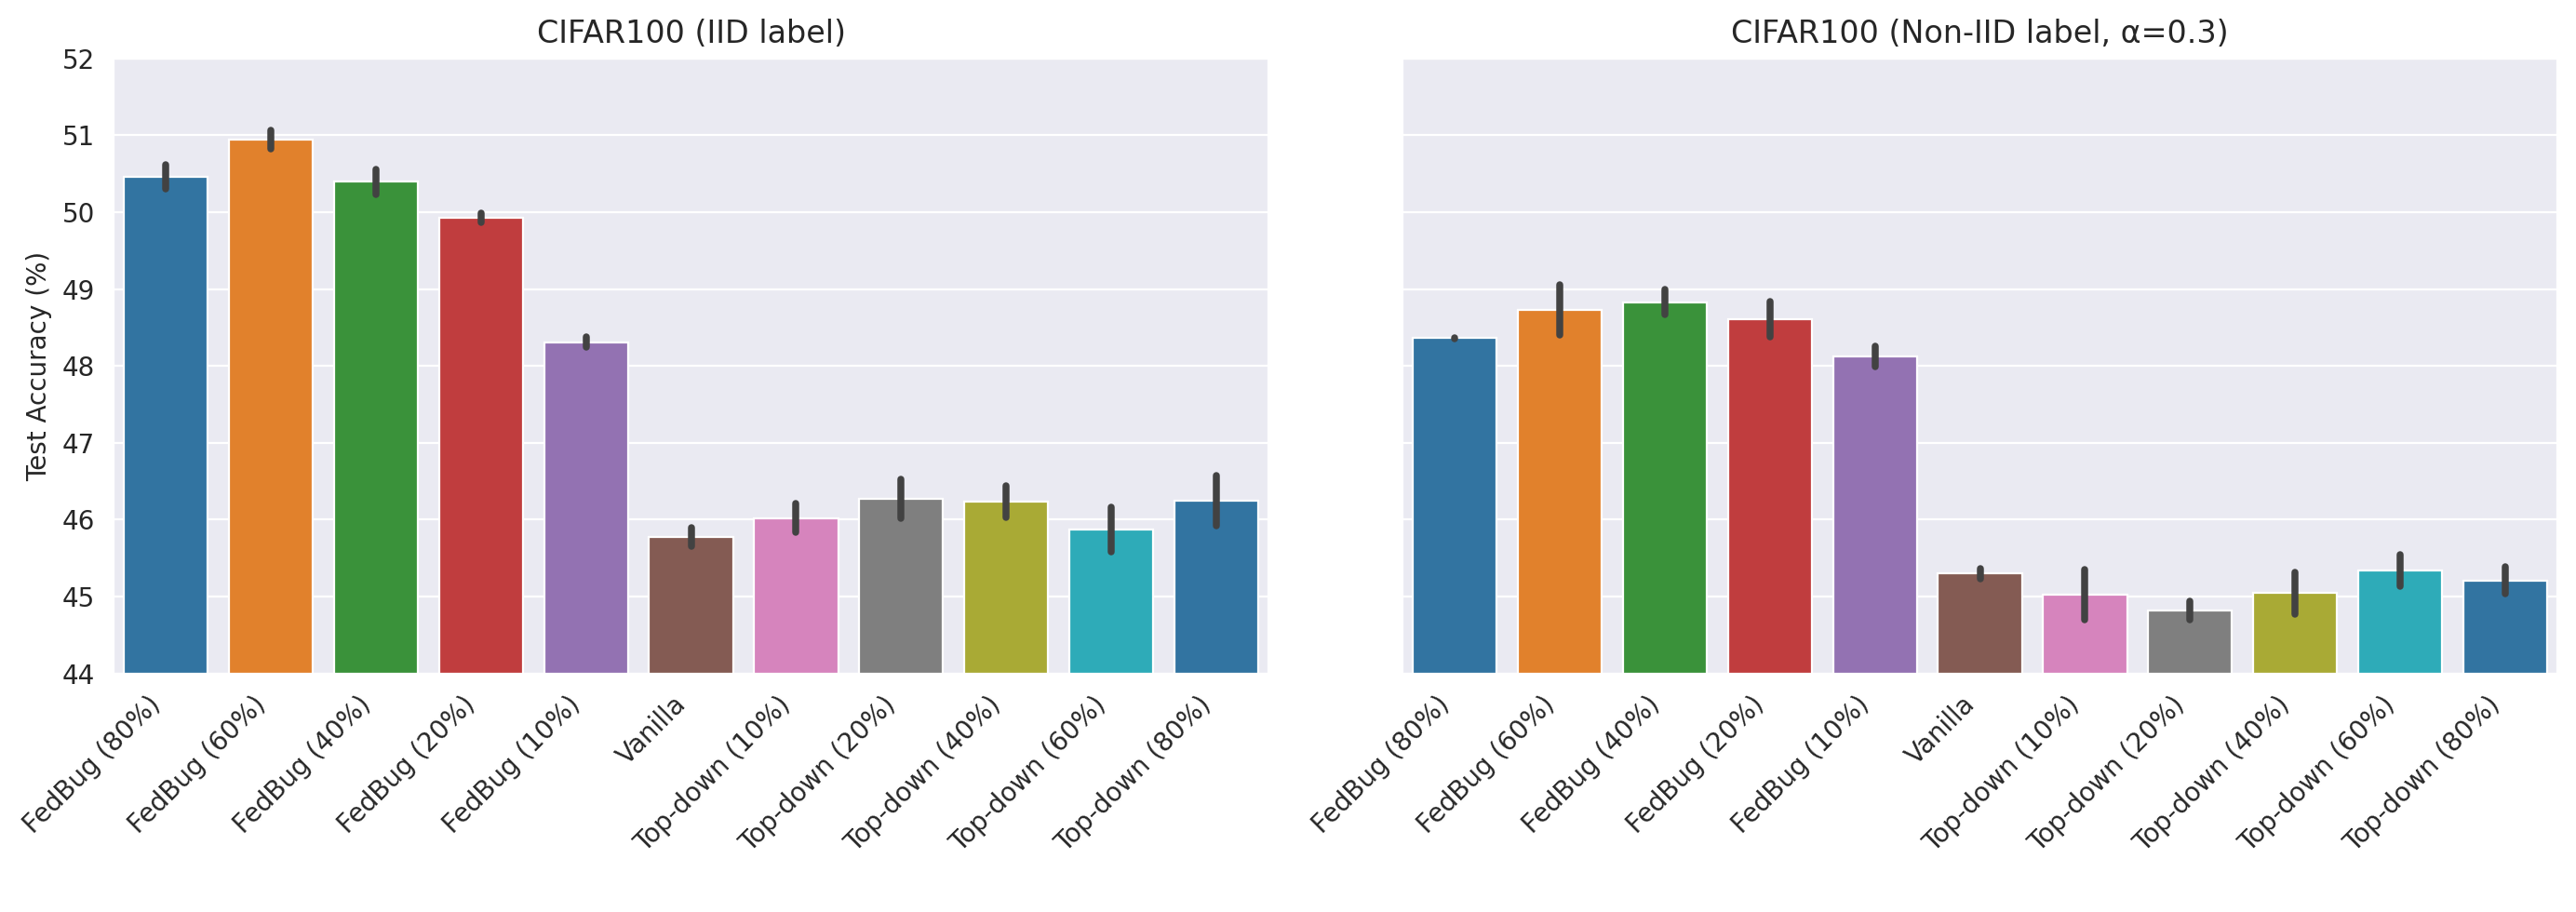

In [12]:
# data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
# data_temp3 = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU111.08": "FedBug (80%)", 
                          "GU111.06": "FedBug (60%)", 
                          "GU111.04": "FedBug (40%)", 
                          "GU111.02": "FedBug (20%)", 
                          "GU111.01": "FedBug (10%)", 
                          "vanilla" : "Vanilla",
                          "GU121.01": "Top-down (10%)", 
                          "GU121.02": "Top-down (20%)", 
                          "GU121.04": "Top-down (40%)", 
                          "GU121.06": "Top-down (60%)", 
                          "GU121.08": "Top-down (80%)", 
                          }                          
                          
        sk = list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([44, 52])
        ax.set_xlabel(" ")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR100 (IID label)")
    axes[1].set_title("CIFAR100 (Non-IID label, α=0.3)")
    
    
    fig.tight_layout()
    plt.pause(0.1)

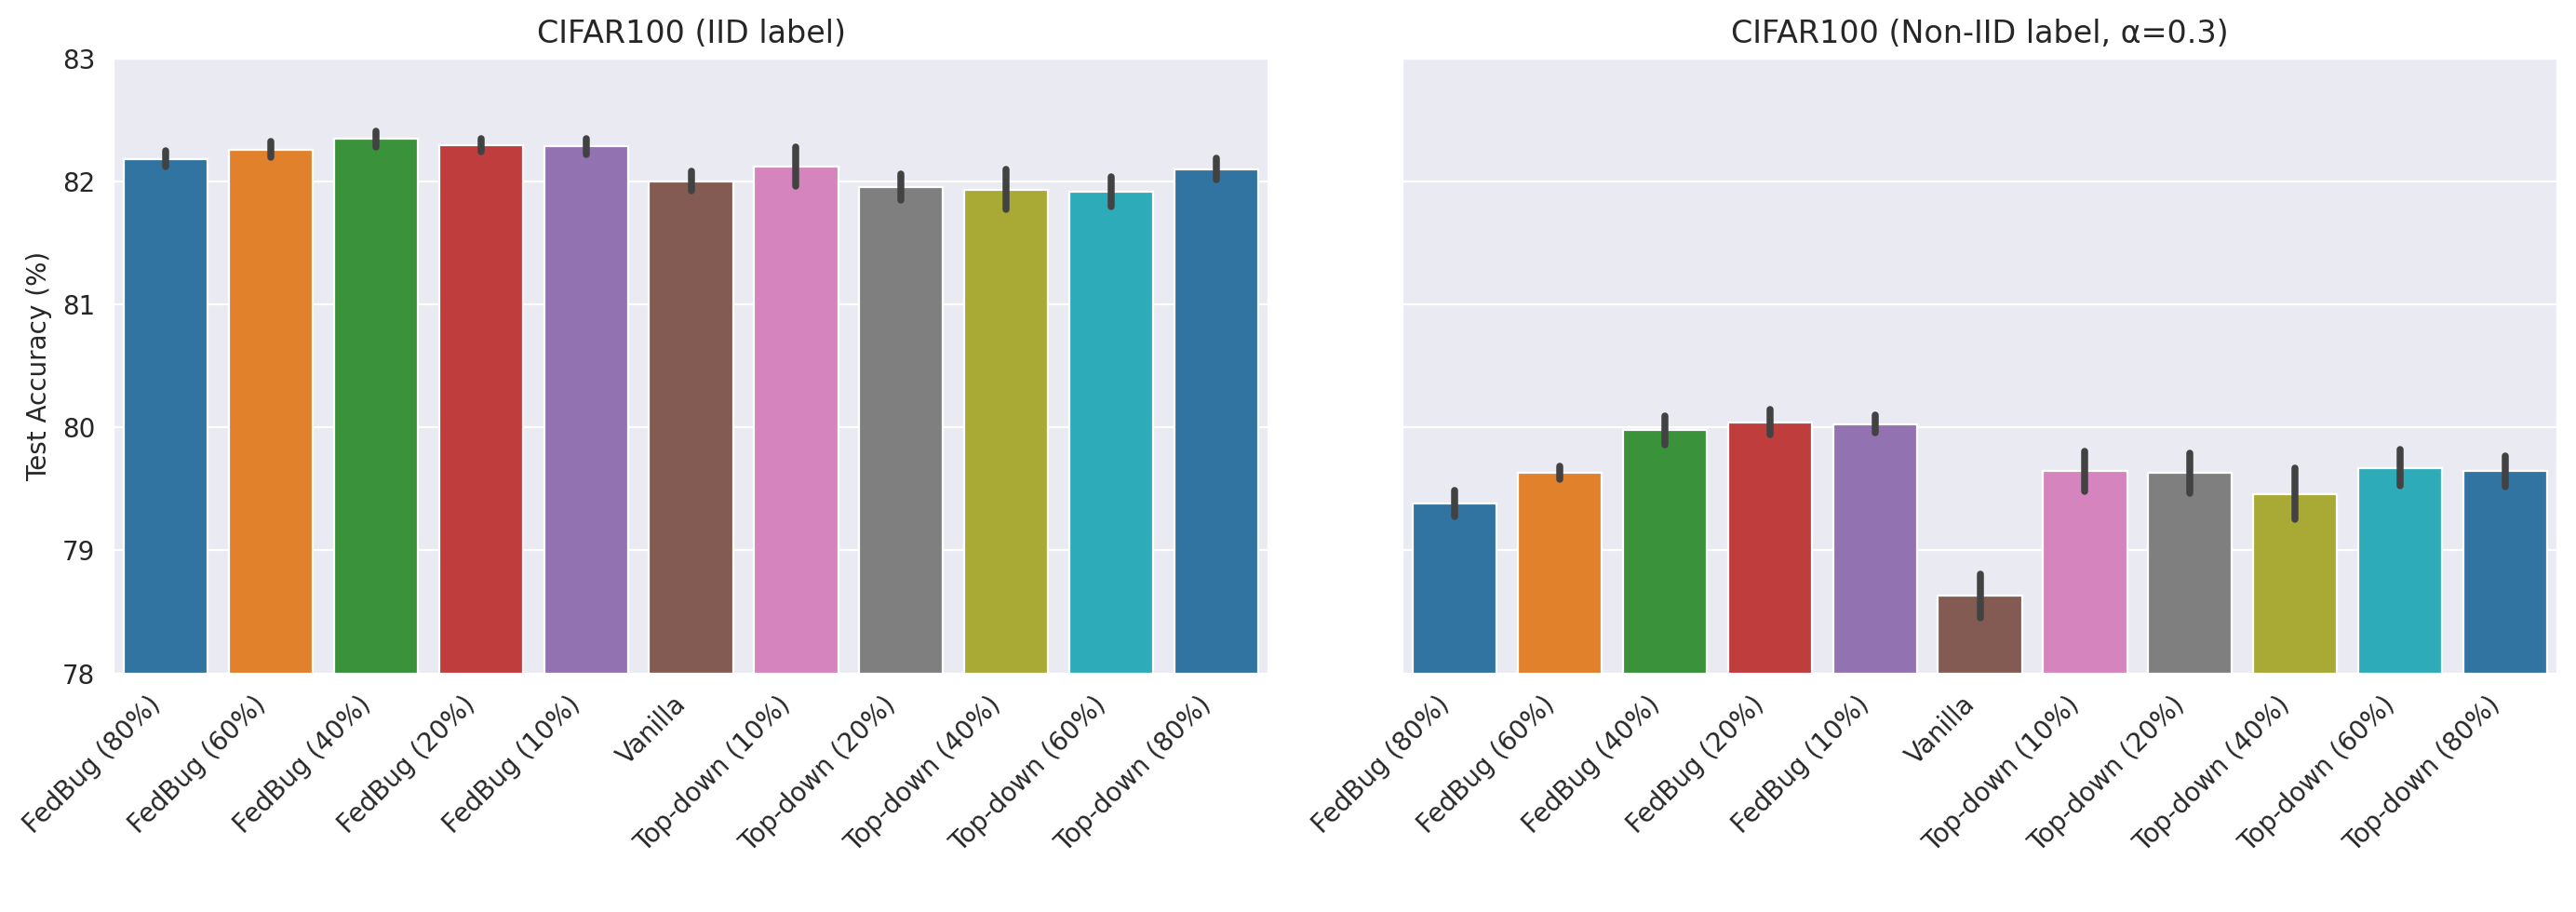

In [13]:
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp3 = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp2, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU111.08": "FedBug (80%)", 
                          "GU111.06": "FedBug (60%)", 
                          "GU111.04": "FedBug (40%)", 
                          "GU111.02": "FedBug (20%)", 
                          "GU111.01": "FedBug (10%)", 
                          "vanilla" : "Vanilla",
                          "GU121.01": "Top-down (10%)", 
                          "GU121.02": "Top-down (20%)", 
                          "GU121.04": "Top-down (40%)", 
                          "GU121.06": "Top-down (60%)", 
                          "GU121.08": "Top-down (80%)", 
                          }                          
                          
        sk = list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 83])
        ax.set_xlabel(" ")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR100 (IID label)")
    axes[1].set_title("CIFAR100 (Non-IID label, α=0.3)")
    
    
    fig.tight_layout()
    plt.pause(0.1)

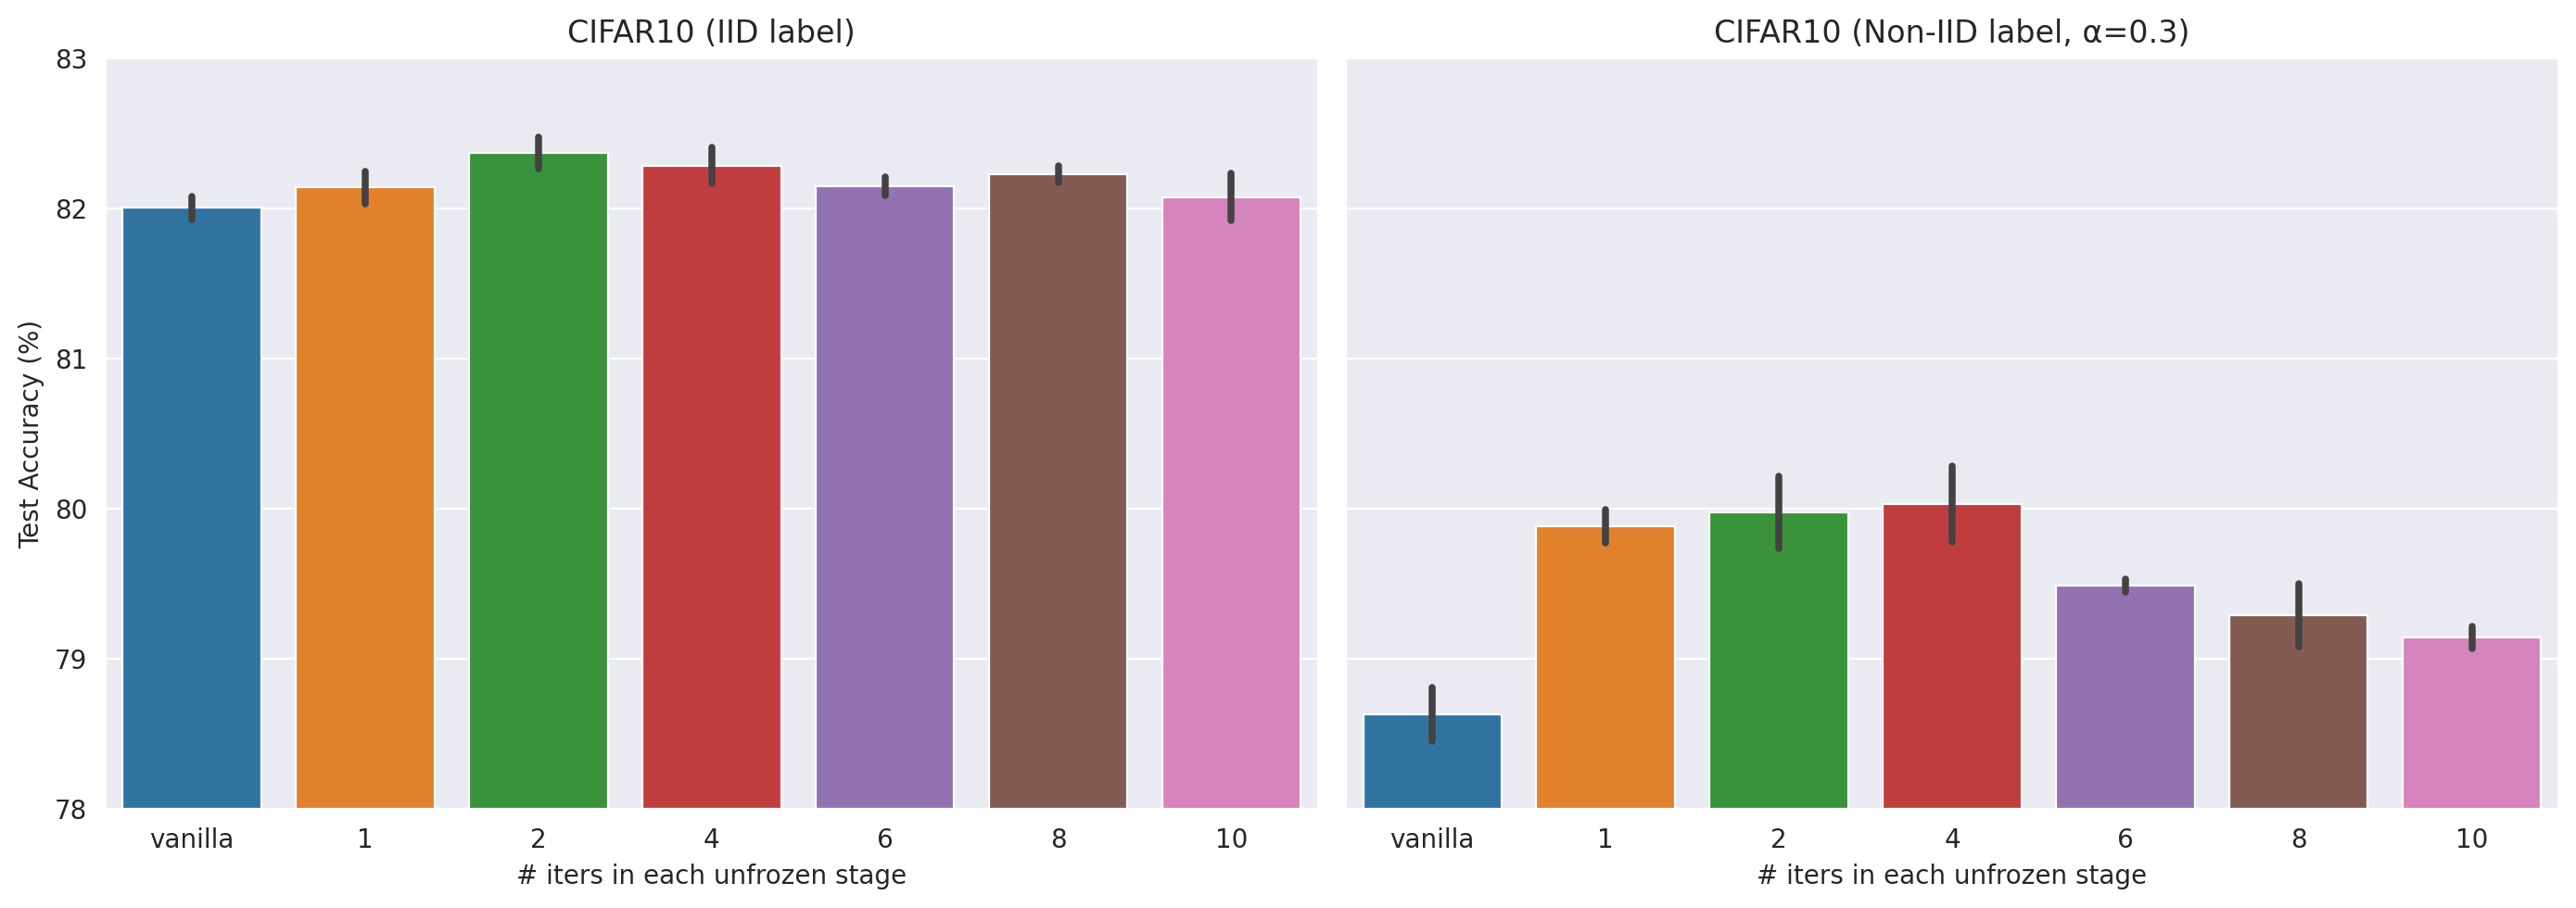

In [ ]:
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp3 = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp2, data_temp3])


for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU111.01": "1", 
                          "GU111.02": "2", 
                          "GU111.04": "4", 
                          "GU111.06": "6", 
                          "GU111.08": "8", 
                          "GU111.1": "10"}
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 83])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR10 (IID label)")
    axes[1].set_title("CIFAR10 (Non-IID label, α=0.3)")
    
    
    fig.tight_layout()
    plt.pause(0.1)

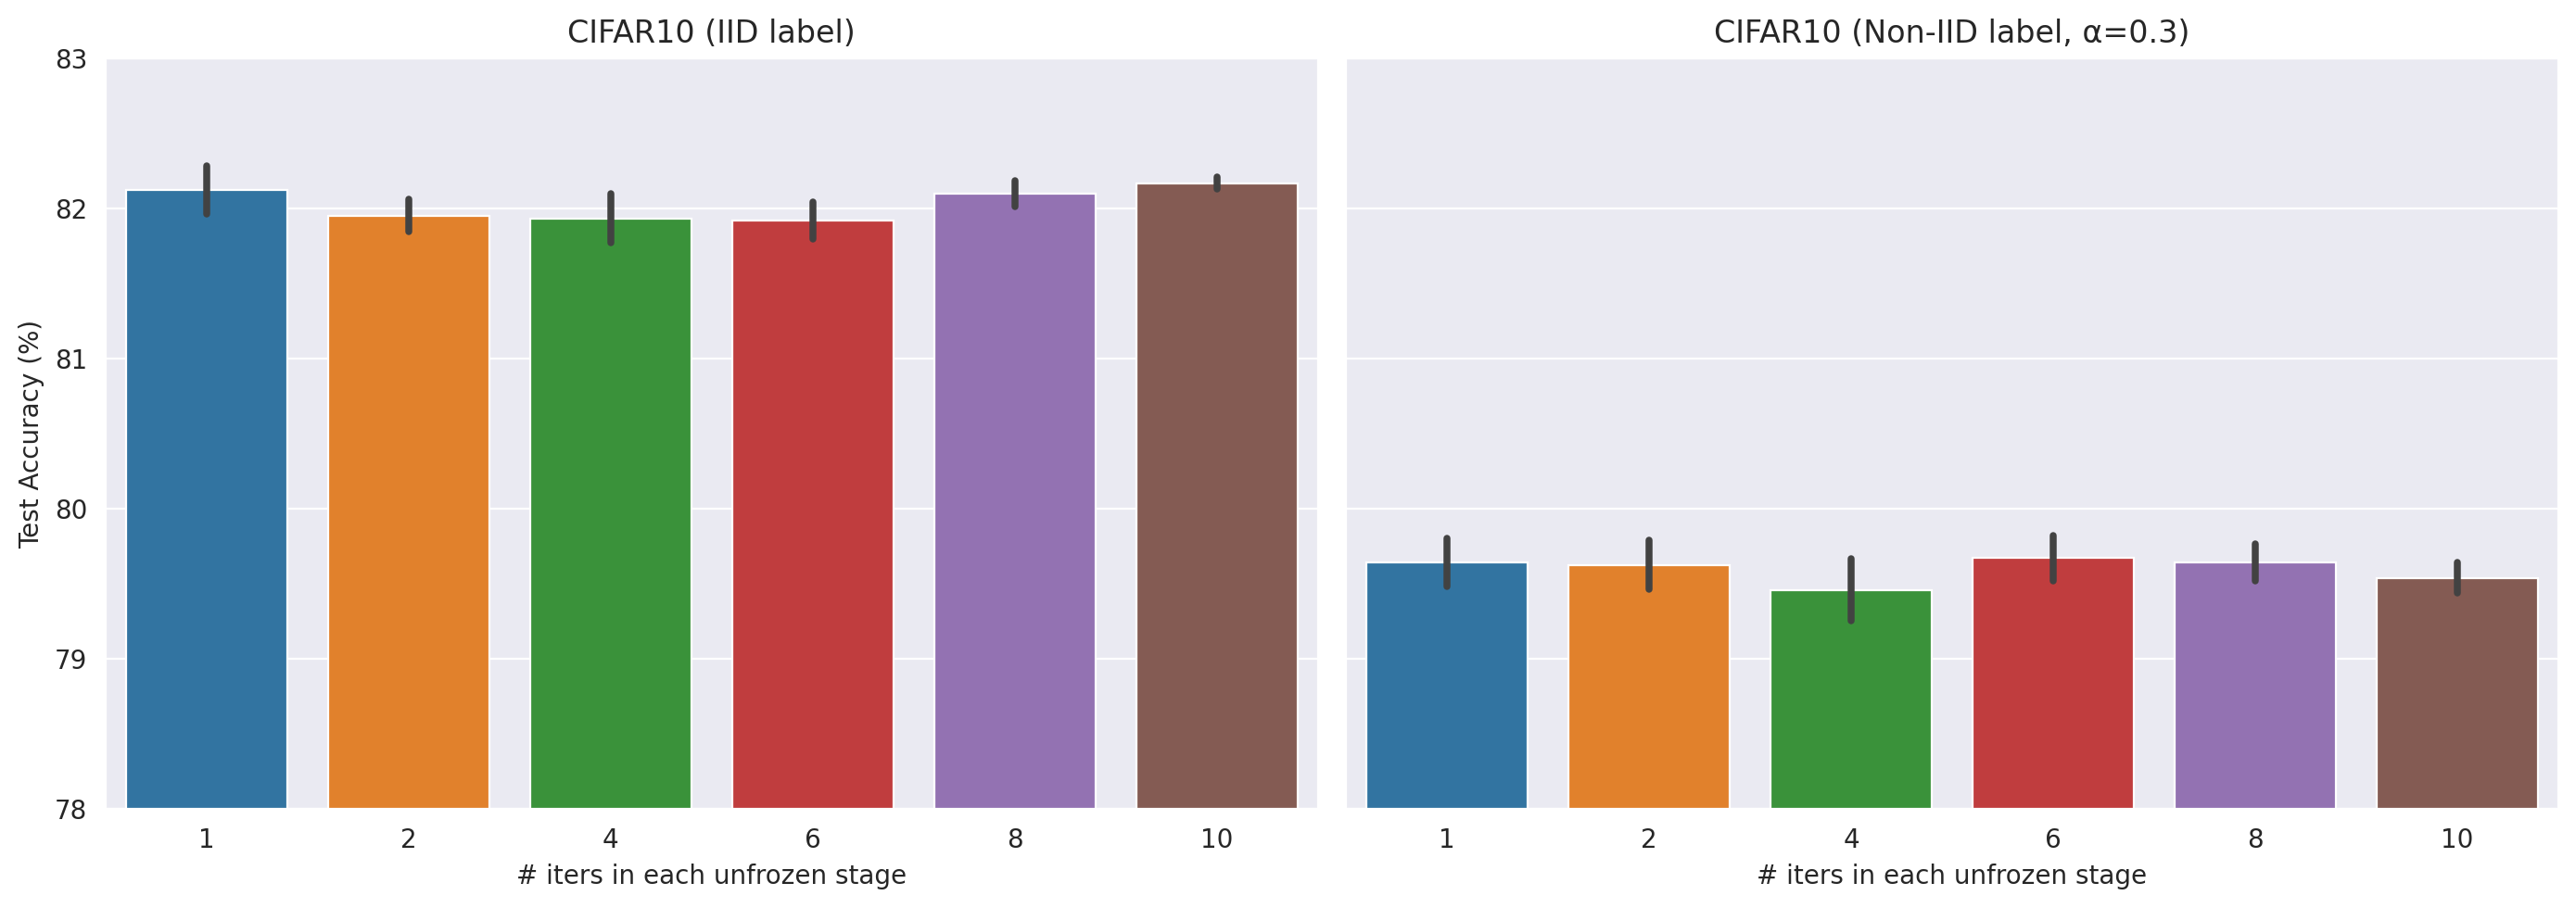

In [ ]:
# data_temp2 = load_data("../Output/CIFAR10-*-N100-*/s[1-9].csv")
data_temp3 = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp2, data_temp3])


for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU121.01": "1", 
                          "GU121.02": "2", 
                          "GU121.04": "4", 
                          "GU121.06": "6", 
                          "GU121.08": "8", 
                          "GU121.1": "10"}
        
        sk = list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 83])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR10 (IID label)")
    axes[1].set_title("CIFAR10 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

In [ ]:
data_temp2

,Unnamed: 0,task,mode,gn,balance,distribution,n_clients,act_prob,seed,epoch,...,a2,a3,a4,l1,l2,l3,l4,Mode,Scaling,Distribution
0,0,CIFAR10,fedavg,0,0,0.0,100,0.01,1,9,...,0.35560,16.80,0.17064,2.152432,2.141037,2.289863,2.289869,fedavg,vanilla,IID partition
1,1,CIFAR10,fedavg,0,0,0.0,100,0.01,1,19,...,0.51718,25.61,0.25530,1.460741,1.439606,2.257379,2.257379,fedavg,vanilla,IID partition
2,2,CIFAR10,fedavg,0,0,0.0,100,0.01,1,29,...,0.53682,32.84,0.33186,1.421662,1.380514,2.222530,2.222431,fedavg,vanilla,IID partition
3,3,CIFAR10,fedavg,0,0,0.0,100,0.01,1,39,...,0.54342,34.87,0.35716,1.864850,1.782028,2.198118,2.197945,fedavg,vanilla,IID partition
4,4,CIFAR10,fedavg,0,0,0.0,100,0.01,1,49,...,0.60854,38.23,0.39030,1.261838,1.195123,2.147800,2.147190,fedavg,vanilla,IID partition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,45,CIFAR10,scaffold,0,0,0.3,100,1.00,4,459,...,0.92742,81.38,0.92742,0.554040,0.258197,0.554040,0.258197,scaffold,vanilla,Non-IID partition (α=0.3)
46,46,CIFAR10,scaffold,0,0,0.3,100,1.00,4,469,...,0.92660,81.53,0.92660,0.556725,0.257984,0.556725,0.257984,scaffold,vanilla,Non-IID partition (α=0.3)
47,47,CIFAR10,scaffold,0,0,0.3,100,1.00,4,479,...,0.92786,81.43,0.92786,0.553382,0.252483,0.553382,0.252483,scaffold,vanilla,Non-IID partition (α=0.3)
48,48,CIFAR10,scaffold,0,0,0.3,100,1.00,4,489,...,0.92998,81.39,0.92998,0.552326,0.250388,0.552326,0.250388,scaffold,vanilla,Non-IID partition (α=0.3)
